### Carbon Emission Reduction via Energy Consumption Prediction
#### INTERMEDIATE LEVEL PROJECT

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


### 1. Generate Sample Energy Dataset (Delhi-based)

In [3]:
np.random.seed(0)

days = 200
temperature = np.random.uniform(15, 45, days)        # Temperature in Delhi
population_index = np.random.uniform(0.9, 1.1, days) # Population effect

energy_consumption = (
    150 +
    (temperature * 4.5) +
    (population_index * 120) +
    np.random.normal(0, 15, days)
)

data = pd.DataFrame({
    "Temperature": temperature,
    "Population_Index": population_index,
    "Energy_Consumption": energy_consumption
})

print("\nDataset Sample:")
print(data.head())


Dataset Sample:
   Temperature  Population_Index  Energy_Consumption
0    31.464405          0.962359          417.479521
1    36.455681          1.039269          436.369207
2    33.082901          0.975550          413.933577
3    31.346495          0.935921          419.535875
4    27.709644          0.904936          366.383300


### 2. Data Preprocessing

In [5]:
X = data[["Temperature", "Population_Index"]]
y = data["Energy_Consumption"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


### 3. Train ML Model (Linear Regression)

model = LinearRegression()
model.fit(X_train, y_train)

### 4. Energy Prediction & Evaluation

In [7]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("Mean Absolute Error:", round(mae, 2))
print("R2 Score:", round(r2, 2))


Model Performance:
Mean Absolute Error: 10.07
R2 Score: 0.9


### 5. Carbon Emission Calculation

In [8]:
# Assumption: 0.82 kg CO2 per kWh
CARBON_FACTOR = 0.82

data["Predicted_Energy"] = model.predict(X)
data["Carbon_Emission_kg"] = data["Predicted_Energy"] * CARBON_FACTOR

total_emission = data["Carbon_Emission_kg"].sum()

print("\nTotal Estimated Carbon Emission (kg):", round(total_emission, 2))


Total Estimated Carbon Emission (kg): 66180.02


### 6. Visualization

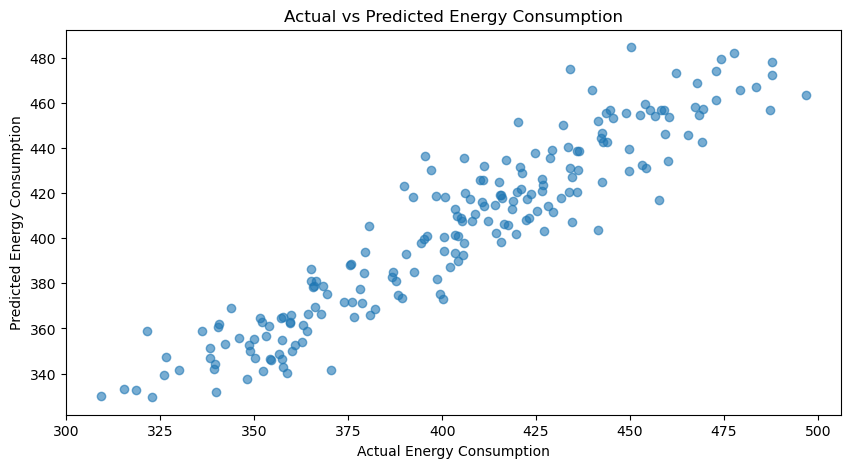

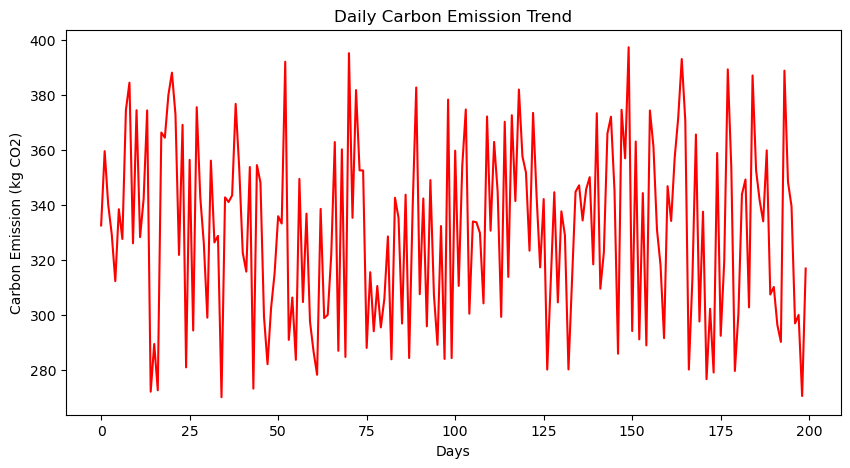

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(data["Energy_Consumption"], data["Predicted_Energy"], alpha=0.6)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(data["Carbon_Emission_kg"], color="red")
plt.xlabel("Days")
plt.ylabel("Carbon Emission (kg CO2)")
plt.title("Daily Carbon Emission Trend")
plt.show()

### 7. Conclusion

In [12]:
print("\nConclusion:")
print("Energy consumption prediction helps estimate carbon emissions.")
print("Such prediction models can assist in emission reduction planning.")


Conclusion:
Energy consumption prediction helps estimate carbon emissions.
Such prediction models can assist in emission reduction planning.
